<a href="https://colab.research.google.com/github/Ihtisham009/Final-Project-MS-data-Science-/blob/main/final_topic_2nd_step_nov_25__MOdel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Subjective Health and Daily Wellbeing from Socioeconomic and Demographic Data**


## **Introduction**
This project aims to predict subjective health and daily wellbeing based on socioeconomic and demographic data. The primary objective is to identify the most significant predictors of subjective wellbeing, including variables such as income, education, employment status, age, and gender. By employing machine learning classification models, the project will assess the performance of these models in categorizing individuals as having high or low subjective wellbeing. The study will also examine the use of advanced categorical encoding techniques and their impact on model accuracy.

## **Research Questions:**
**1. To what extent can socioeconomic and demographic features (e.g., income, education, employment status, age, gender) classify individuals as having high or low subjective wellbeing?**

**2. Which socioeconomic or demographic variables emerge as the strongest predictors of subjective wellbeing, and do these align with findings in wellbeing and social science literature?**

**3. Does the inclusion of dummy variables and advanced categorical encoding techniques significantly improve the predictive performance of classification models compared to simpler encodings?**



# **Import Libraries and Load the Dataset**
We start by importing all required Python libraries and loading the Excel file (`Raw Data.xlsx`) into a pandas DataFrame.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from time import perf_counter
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_curve, auc
)

from time import time

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_curve, auc, roc_auc_score,
    accuracy_score, f1_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# Load Excel file (second row contains headers)
df = pd.read_excel("/content/Raw Data.xlsx", header=1)
print("Original shape:", df.shape)
df.head()


Original shape: (1306, 42)


,1. Year of birth:,2. Gender,3. What is the socio-economic status of your home?,"4. According to your culture, people, or physical features, you are or are recognized as:",5.1 How many years of education did your parents receive? Father,5.2 How many years of education did your parents receive? Mother,"6. In general, how satisfied are you with all aspects of your life?",7. How happy did you feel yesterday?,8. How much did you laugh yesterday?,9. Did you learn new or exciting things yesterday?,...,"17.7 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Feeling afraid, as if something awful might happen","18.1 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Little interest or pleasure in doing things","18.2 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Feeling down, depressed, or hopeless","18.3 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Trouble falling or staying asleep, or sleeping too much","18.4 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Feeling tired or having little energy","18.5 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Poor appetite or overeating","18.6 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Feeling bad about yourself or that you are a failure or have let yourself or your family down","18.7 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Trouble concentrating on things, such as reading the newspaper or watching television","18.8 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3 is 'Nearly every day'. Over the last two weeks, how often have you been bothered by the following problems?: Moving or speaking so slowly that other people could have noticed. Or the opposite being so figety or restless that you have been moving around a lot more than usual","18.9 Next, you will be asked questions about your emotional state. Please answer on a scale of 0 to 3, where 0 is 'Not at all', 1 is 'several days', 2 is 'more than half of the days', and 3

# **Clean Column Names**
We remove special characters, extra spaces, and replace them with underscores for uniformity.


In [ ]:
# Clean column names by removing numbers, special characters, and extra spaces
def clean_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        # Remove leading numbers and periods, then strip whitespace
        new_col = col.split('. ')[-1].strip()
        # Replace spaces and special characters with underscores
        new_col = new_col.replace(' ', '_').replace('?', '').replace(':', '').replace(',', '').replace('-', '_').replace('(', '').replace(')', '').replace('.', '')
        new_cols.append(new_col)
    df.columns = new_cols
    return df

df = clean_col_names(df)
print("Cleaned shape:", df.shape)
df.head()

Cleaned shape: (1306, 42)


,Year_of_birth,Gender,What_is_the_socio_economic_status_of_your_home,According_to_your_culture_people_or_physical_features_you_are_or_are_recognized_as,51_How_many_years_of_education_did_your_parents_receive_Father,52_How_many_years_of_education_did_your_parents_receive_Mother,In_general_how_satisfied_are_you_with_all_aspects_of_your_life,How_happy_did_you_feel_yesterday,How_much_did_you_laugh_yesterday,Did_you_learn_new_or_exciting__things_yesterday,...,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Feeling_afraid_as_if_something_awful_might_happen,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Little_interest_or_pleasure_in_doing_things,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Feeling_down_depressed_or_hopeless,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Trouble_falling_or_staying_asleep_or_sleeping_too_much,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Feeling_tired_or_having_little_energy,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Poor_appetite_or_overeating,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Feeling_bad_about_yourself_or_that_you_are_a_failure_or_have_let_yourself_or_your_family_down,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Trouble_concentrating_on_things_such_as_reading_the_newspaper_or_watching_television,Or_the_opposite_being_so_figety_or_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Thoughts_that_you_would_be_better_off_dead_or_of_hurting_yourself
0,1962.0,1.0,2.0,5.0,NaN,NaN,10,10.0,5.0,10.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970.0,1.0,2.0,5.0,NaN,NaN,7,10.0,10.0,5.0,...,0.0,0.0,0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1975.0,1.0,3.0,6.0,NaN,NaN,10,10.0,10.0,10.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1959.0,1.0,3.0,5.0,NaN,NaN,1,10.0,6.0,6.0,...,0.0,1.0,0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
4,1959.0,1.0,3.0,6.0,NaN,NaN,10,10.0,10.0,8.0,...,0.0,0.0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


# **Identify Relevant Columns**
We automatically detect wellbeing-related and demographic columns based on keyword search.


In [ ]:
def find_columns(df_cols, include_any=None):
    if include_any is None:
        return []
    incl = [k.lower() for k in include_any]
    return [c for c in df_cols if any(k in c.lower() for k in incl)]

cols_happy = find_columns(df.columns, ["happy"])
cols_satisfied = find_columns(df.columns, ["satisfied"])
cols_enjoy = find_columns(df.columns, ["enjoy"])
cols_laugh = find_columns(df.columns, ["laugh"])
cols_depressed = find_columns(df.columns, ["depressed", "hopeless"])
cols_worry = find_columns(df.columns, ["worry"])
cols_stress = find_columns(df.columns, ["stress"])
cols_lonely = find_columns(df.columns, ["lonely"])

demo_year = find_columns(df.columns, ["year_of_birth"])
demo_gender = find_columns(df.columns, ["gender"])
demo_ses = find_columns(df.columns, ["socio", "income"])
demo_culture = find_columns(df.columns, ["culture"])
demo_parent_edu = find_columns(df.columns, ["father", "mother", "education"])

print("Positive wellbeing columns:", cols_happy + cols_satisfied + cols_enjoy + cols_laugh)
print("Negative wellbeing columns:", cols_depressed + cols_worry + cols_stress + cols_lonely)
print("Demographic columns:", demo_year + demo_gender + demo_ses + demo_culture + demo_parent_edu)


Positive wellbeing columns: ['How_happy_did_you_feel_yesterday', 'In_general_how_satisfied_are_you_with_all_aspects_of_your_life', 'How_much_did_you_enjoy_the_activities_you_did_yesterday', 'How_much_did_you_laugh_yesterday']
Negative wellbeing columns: ['How_depressed_did_you_feel_yesterday', 'Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Feeling_down_depressed_or_hopeless', 'Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Not_being_able_to_stop_or_control_worrying', 'Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Worrying_too_much_about_different_things', 'How_much_stress_did_you_feel_yesterday', "Please_answer_on_a_scale_of_0_to_4_where_0_is_never_1_is_'almost_never'_2_is_'sometimes'_3_is_'fairly_often'_and_4_is_'very_often'_how_often_you_experienced_the_following_feelings_during_the_last_month_how_often_have_you_felt_nervous_and_stressed", 'How_lonely_or_unsupported_did_you_f

#  **Convert to Numeric and Build Wellbeing Score**
Convert identified wellbeing columns to numeric, reverse the negative ones, and compute a composite wellbeing score.


In [ ]:
def to_numeric(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

def reverse_score(series):
    s = pd.to_numeric(series, errors="coerce")
    max_val = 10 if s.max(skipna=True) > 5 else 4
    return max_val - s

pos_cols = cols_happy + cols_satisfied + cols_enjoy + cols_laugh
neg_cols = cols_depressed + cols_worry + cols_stress + cols_lonely

df = to_numeric(df, pos_cols + neg_cols)

pos_df = df[pos_cols]
neg_df = df[neg_cols].apply(reverse_score)

wellbeing_all = pd.concat([pos_df, neg_df], axis=1)
df["Wellbeing_Score"] = wellbeing_all.mean(axis=1)
df["Wellbeing_Label"] = (df["Wellbeing_Score"] >= df["Wellbeing_Score"].median()).astype(int)
df[["Wellbeing_Score", "Wellbeing_Label"]].head()


,Wellbeing_Score,Wellbeing_Label
0,7.272727,1
1,6.909091,1
2,7.727273,1
3,5.181818,0
4,7.545455,1


In [ ]:
df

,Year_of_birth,Gender,What_is_the_socio_economic_status_of_your_home,According_to_your_culture_people_or_physical_features_you_are_or_are_recognized_as,51_How_many_years_of_education_did_your_parents_receive_Father,52_How_many_years_of_education_did_your_parents_receive_Mother,In_general_how_satisfied_are_you_with_all_aspects_of_your_life,How_happy_did_you_feel_yesterday,How_much_did_you_laugh_yesterday,Did_you_learn_new_or_exciting__things_yesterday,...,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Feeling_down_depressed_or_hopeless,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Trouble_falling_or_staying_asleep_or_sleeping_too_much,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Feeling_tired_or_having_little_energy,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Poor_appetite_or_overeating,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Feeling_bad_about_yourself_or_that_you_are_a_failure_or_have_let_yourself_or_your_family_down,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Trouble_concentrating_on_things_such_as_reading_the_newspaper_or_watching_television,Or_the_opposite_being_so_figety_or_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Over_the_last_two_weeks_how_often_have_you_been_bothered_by_the_following_problems_Thoughts_that_you_would_be_better_off_dead_or_of_hurting_yourself,Wellbeing_Score,Wellbeing_Label
0,1962.0,1.0,2.0,5.0,NaN,NaN,10,10.0,5.0,10.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.272727,1
1,1970.0,1.0,2.0,5.0,NaN,NaN,7,10.0,10.0,5.0,...,0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,6.909091,1
2,1975.0,1.0,3.0,6.0,NaN,NaN,10,10.0,10.0,10.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.727273,1
3,1959.0,1.0,3.0,5.0,NaN,NaN,1,10.0,6.0,6.0,...,0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,5.181818,0
4,1959.0,1.0,3.0,6.0,NaN,NaN,10,10.0,10.0,8.0,...,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,7.545455,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,1964.0,1.0,3.0,1.0,5.0,5.0,10,10.0,10.0,6.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.818182,1
1302,1960.0,2.0,3.0,5.0,NaN,NaN,10,10.0,10.0,10.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.454545,1
1303,2001.0,1.0,3.0,5.0,16.0,16.0,7,10.0,5.0,8.0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.000000,1
1304,2002.0,1.0,3.0,6.0,NaN,NaN,5,7.0,2.0,0.0,...,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.181818,0


# **Exploratory Data Analysis (EDA)**
We visualize the distribution of the wellbeing score and check the class balance for the binary label.


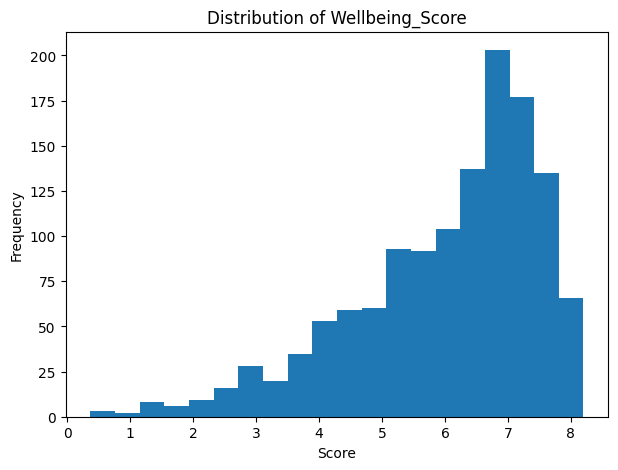

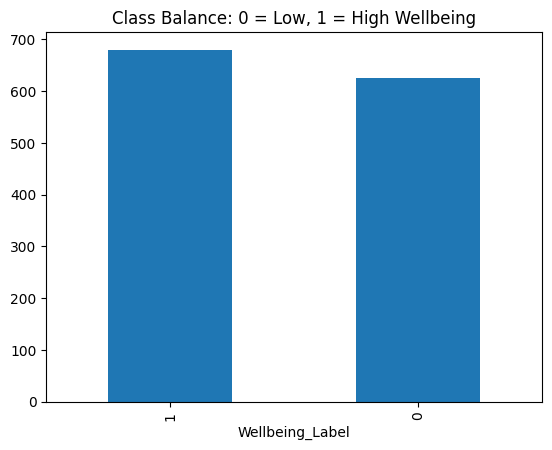

In [ ]:
plt.figure(figsize=(7,5))
df["Wellbeing_Score"].plot(kind="hist", bins=20)
plt.title("Distribution of Wellbeing_Score")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

df["Wellbeing_Label"].value_counts().plot(kind="bar")
plt.title("Class Balance: 0 = Low, 1 = High Wellbeing")
plt.show()


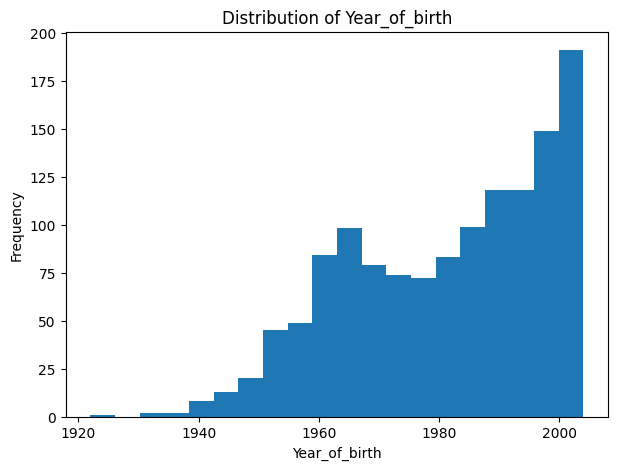

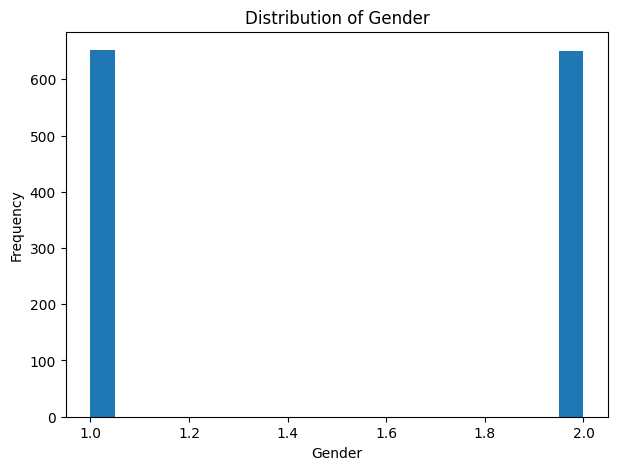

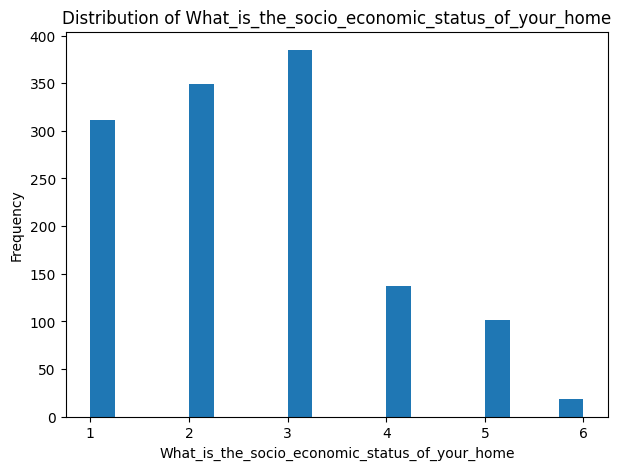

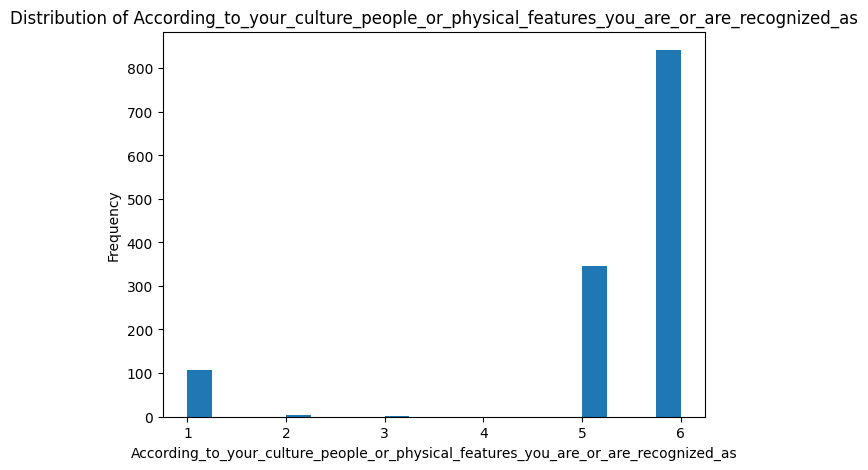

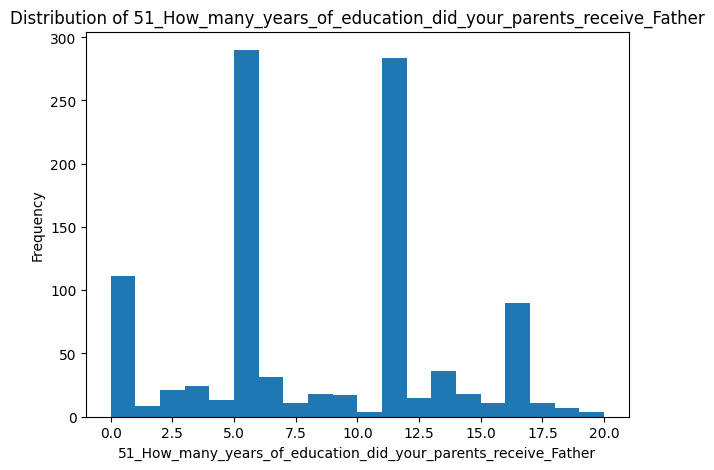

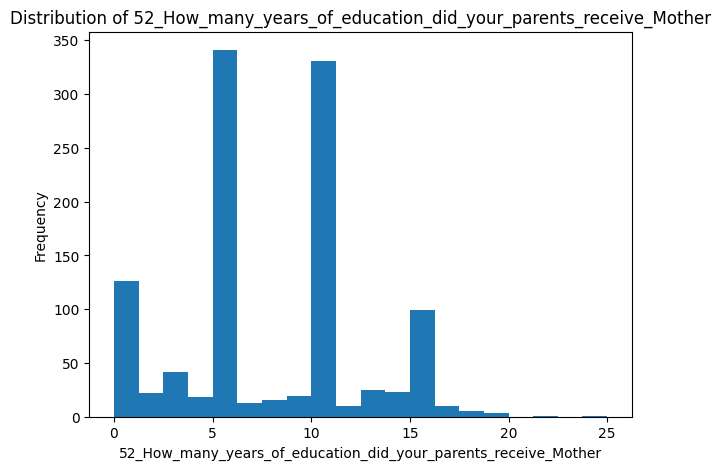

In [ ]:
# Visualize distributions of demographic features
demo_cols = demo_year + demo_gender + demo_ses + demo_culture + demo_parent_edu

for col in demo_cols:
    if col in df.columns:
        plt.figure(figsize=(7,5))
        if df[col].dtype == 'object':
            df[col].value_counts().plot(kind='bar')
        else:
            df[col].plot(kind='hist', bins=20)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

# **Model Implementation and Training**

**Dataset splitting and pre-processing**

In [ ]:
# Assumes your DataFrame is already loaded as `df`
TARGET = "Wellbeing_Label"

# Features / target
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

# Holdout split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale (good for LR & KNN; OK for GNB)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled  = scaler.transform(X_test_imp)


**Defining Models**

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, solver="lbfgs"),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=7),
    "Gaussian NB": GaussianNB()
}


**Function for Evaluation**

In [ ]:
def evaluate_model(name, model, Xtr, Xte, ytr, yte):
    # Train timing
    t0 = time()
    model.fit(Xtr, ytr)
    train_time = time() - t0

    # Predict timing
    t1 = time()
    y_pred = model.predict(Xte)
    y_proba = model.predict_proba(Xte)
    pred_time = time() - t1

    # Confusion matrix
    labels = np.unique(yte)
    cm = confusion_matrix(yte, y_pred, labels=labels)

    # Classification report (string)
    cls_report = classification_report(yte, y_pred, digits=3)

    # Accuracy / F1 (macro)
    acc = accuracy_score(yte, y_pred)
    f1m = f1_score(yte, y_pred, average="macro")

    # ROC / AUC (binary vs multiclass one-vs-rest)
    if len(labels) == 2:
        fpr, tpr, _ = roc_curve(yte, y_proba[:, 1], pos_label=labels.max())
        roc_auc = auc(fpr, tpr)

        # Plot ROC
        plt.figure(figsize=(5.2, 4.0))
        plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.3f}")
        plt.plot([0, 1], [0, 1], lw=1, linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC — {name}")
        plt.legend(loc="lower right")
        plt.show()
    else:
        classes_sorted = np.sort(labels)
        y_bin = label_binarize(yte, classes=classes_sorted)
        roc_auc = roc_auc_score(y_bin, y_proba, average="macro", multi_class="ovr")

        # Plot per-class ROC (OvR)
        plt.figure(figsize=(5.8, 4.2))
        for i, c in enumerate(classes_sorted):
            fpr, tpr, _ = roc_curve(y_bin[:, i], y_proba[:, i])
            plt.plot(fpr, tpr, lw=1.2, label=f"Class {c}")
        plt.plot([0, 1], [0, 1], lw=1, linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC (OvR) — {name} | macro AUC={roc_auc:.3f}")
        plt.legend(loc="lower right", ncol=2)
        plt.show()

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(4.6, 4.2))
    disp.plot(ax=ax, colorbar=False)
    plt.title(f"Confusion Matrix — {name}")
    plt.show()

    # Print classification report
    print(f"=== Classification Report — {name} ===")
    print(cls_report)

    # Return row for summary table
    return {
        "Model": name,
        "Test Accuracy": acc,
        "Test Macro-F1": f1m,
        "AUC (OvR/Binary)": roc_auc,
        "Train Time (s)": train_time,
        "Predict Time (s)": pred_time
    }


**Model Training**
- Logistic Regression
- KNN
- Gaussian NB

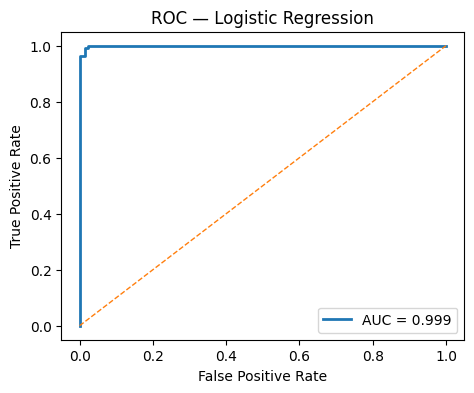

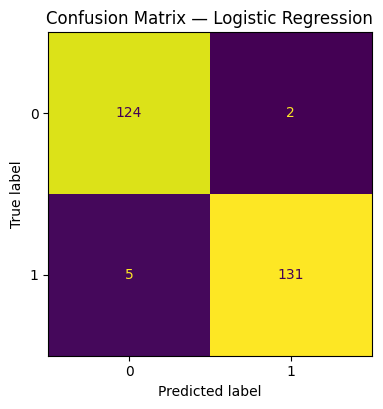

=== Classification Report — Logistic Regression ===
              precision    recall  f1-score   support

           0      0.961     0.984     0.973       126
           1      0.985     0.963     0.974       136

    accuracy                          0.973       262
   macro avg      0.973     0.974     0.973       262
weighted avg      0.974     0.973     0.973       262



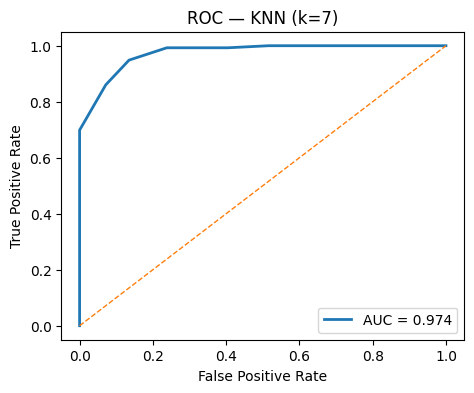

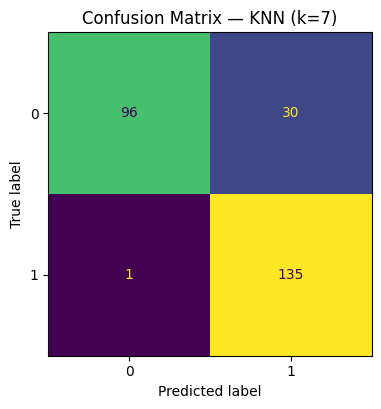

=== Classification Report — KNN (k=7) ===
              precision    recall  f1-score   support

           0      0.990     0.762     0.861       126
           1      0.818     0.993     0.897       136

    accuracy                          0.882       262
   macro avg      0.904     0.877     0.879       262
weighted avg      0.901     0.882     0.880       262



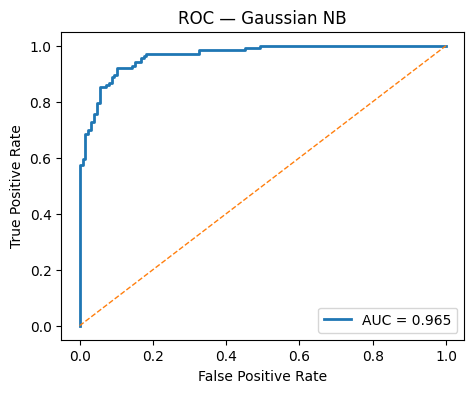

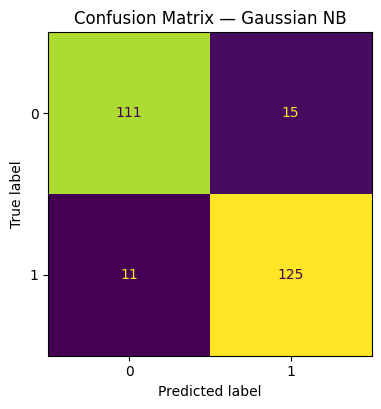

=== Classification Report — Gaussian NB ===
              precision    recall  f1-score   support

           0      0.910     0.881     0.895       126
           1      0.893     0.919     0.906       136

    accuracy                          0.901       262
   macro avg      0.901     0.900     0.900       262
weighted avg      0.901     0.901     0.901       262



,Model,Test Accuracy,Test Macro-F1,AUC (OvR/Binary),Train Time (s),Predict Time (s)
0,Logistic Regression,0.973282,0.973263,0.999358,0.074647,0.000875
1,Gaussian NB,0.900763,0.900479,0.964869,0.007580,0.007343
2,KNN (k=7),0.881679,0.878998,0.973506,0.003728,0.028773


In [ ]:
results = []
for name, model in models.items():
    row = evaluate_model(name, model, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append(row)

summary_df = pd.DataFrame(results).sort_values(by=["Test Accuracy", "Test Macro-F1"], ascending=False)
summary_df.reset_index(drop=True, inplace=True)
summary_df


**Stratified K-Fold Cross Validation**

In [ ]:
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

def simple_cv_scores(model, X_arr, y_arr):
    accs, f1s = [], []
    for tr_idx, va_idx in skf.split(X_arr, y_arr):
        X_tr, X_va = X_arr[tr_idx], X_arr[va_idx]
        y_tr, y_va = y_arr[tr_idx], y_arr[va_idx]
        model.fit(X_tr, y_tr)
        y_hat = model.predict(X_va)
        accs.append(accuracy_score(y_va, y_hat))
        f1s.append(f1_score(y_va, y_hat, average="macro"))
    return np.mean(accs), np.std(accs), np.mean(f1s), np.std(f1s)

cv_rows = []
for name, base_model in models.items():
    # Fresh instance per model (to avoid any learned state)
    if "Logistic" in name:
        mdl = LogisticRegression(max_iter=2000, solver="lbfgs")
    elif "KNN" in name:
        mdl = KNeighborsClassifier(n_neighbors=7)
    else:
        mdl = GaussianNB()

    acc_mu, acc_sd, f1_mu, f1_sd = simple_cv_scores(mdl, X_train_scaled, y_train.values)
    cv_rows.append({
        "Model": name,
        "CV (k=5) Acc Mean": acc_mu,
        "CV Acc SD": acc_sd,
        "CV Macro-F1 Mean": f1_mu,
        "CV Macro-F1 SD": f1_sd
    })

cv_df = pd.DataFrame(cv_rows).sort_values(by=["CV (k=5) Acc Mean", "CV Macro-F1 Mean"], ascending=False)
cv_df.reset_index(drop=True, inplace=True)
cv_df


,Model,CV (k=5) Acc Mean,CV Acc SD,CV Macro-F1 Mean,CV Macro-F1 SD
0,Logistic Regression,0.977963,0.010759,0.977904,0.010795
1,Gaussian NB,0.918568,0.020589,0.918438,0.020558
2,KNN (k=7),0.884086,0.024165,0.882756,0.024611
